# House Price Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Dataset Column Informations

In [2]:
'''The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's'''

"The Boston Housing Dataset\n\nThe Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:\n\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

## Importing Dataset(Boston Housing Dataset)

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Housing_df = pd.read_csv("Boston_Housing.csv", header=None,delimiter= r"\s+",names=column_names)

In [4]:
Housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
np.shape(Housing_df)

(506, 14)

In [6]:
Housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


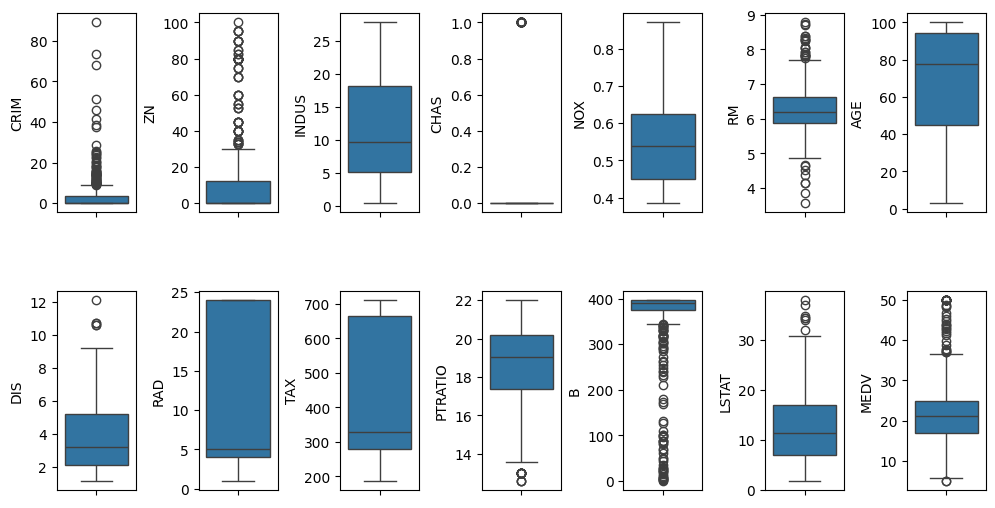

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in Housing_df.items():
    sns.boxplot(y=k, data=Housing_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [9]:
for k, v in Housing_df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(Housing_df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))


Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [10]:
np.shape(Housing_df)

(506, 14)

In [11]:
Housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [12]:
Housing_df= Housing_df[~(Housing_df['MEDV'] >= 50.0)]
Housing_df.shape

(490, 14)

In [13]:
Housing_df= Housing_df[~(Housing_df['CRIM'] >= 80.0)]
Housing_df.shape

(489, 14)

In [14]:
Housing_df= Housing_df[~(Housing_df['DIS'] >= 10.0)]
Housing_df.shape

(484, 14)

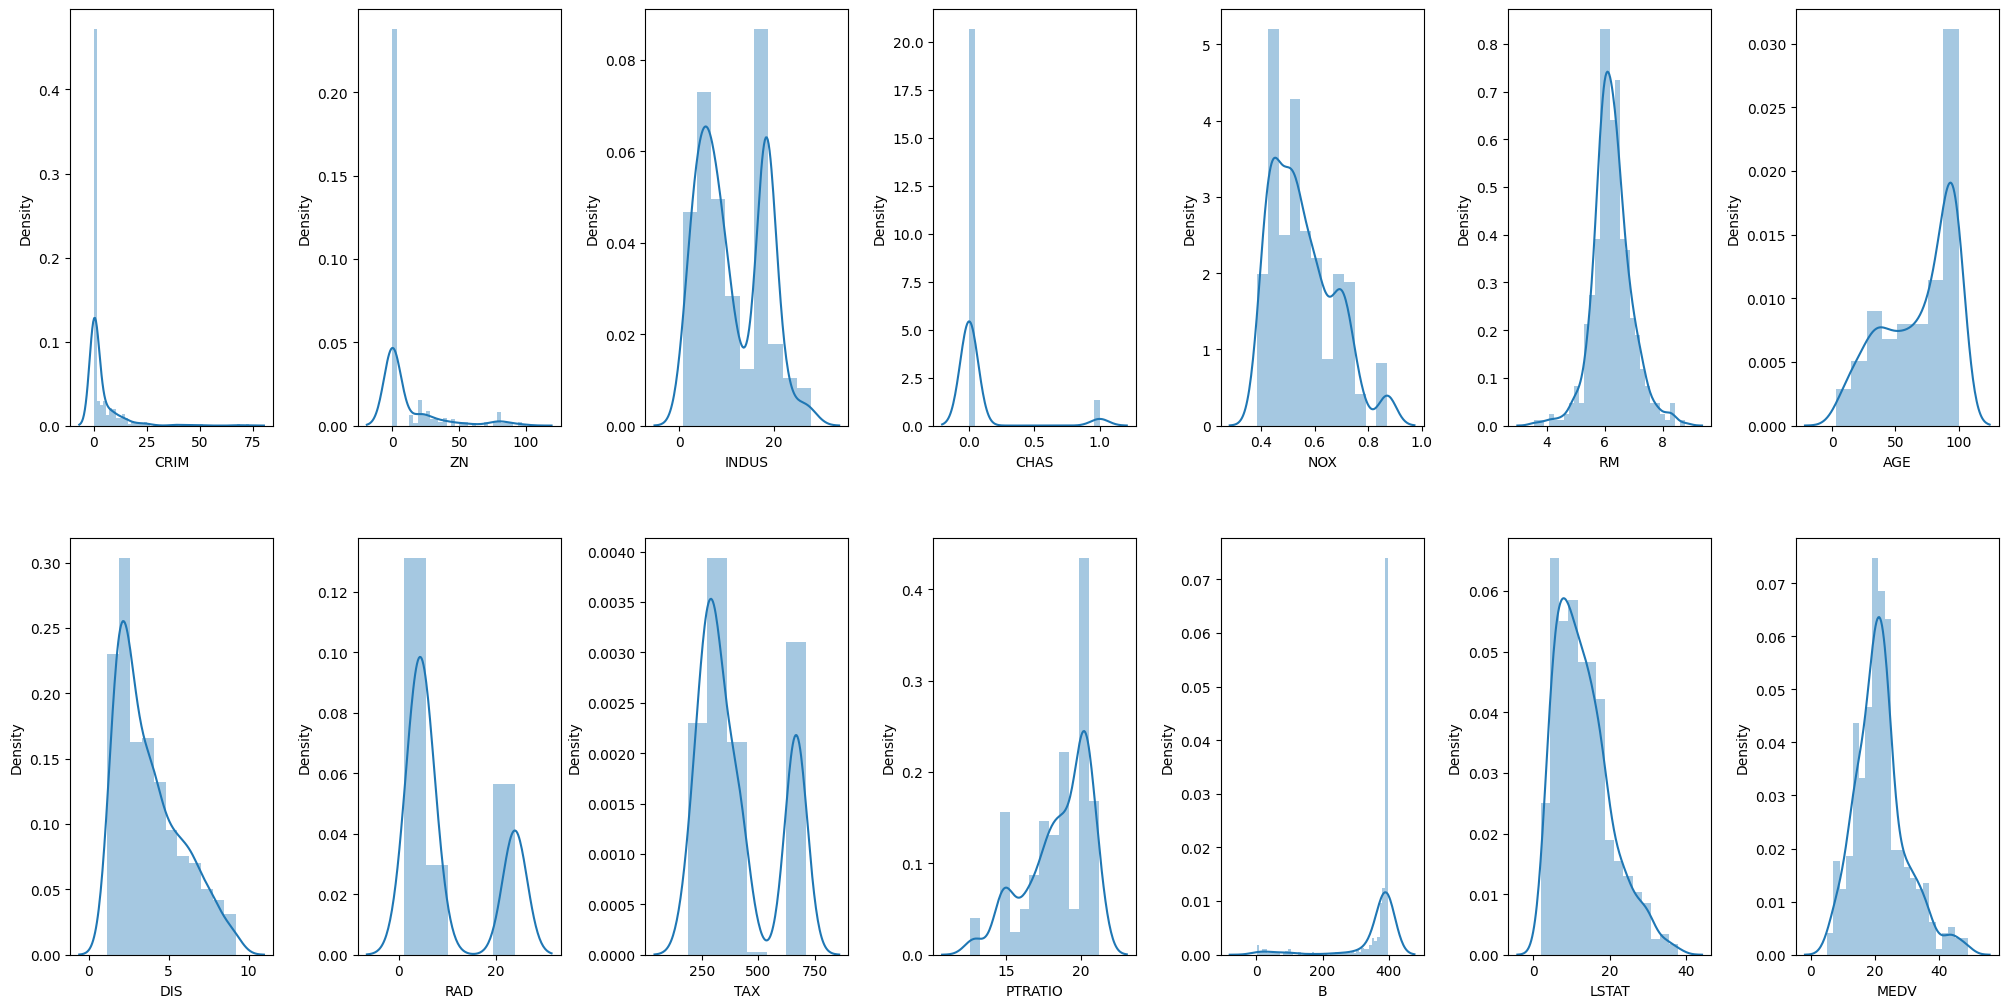

In [15]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Housing_df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Coreleation matrix

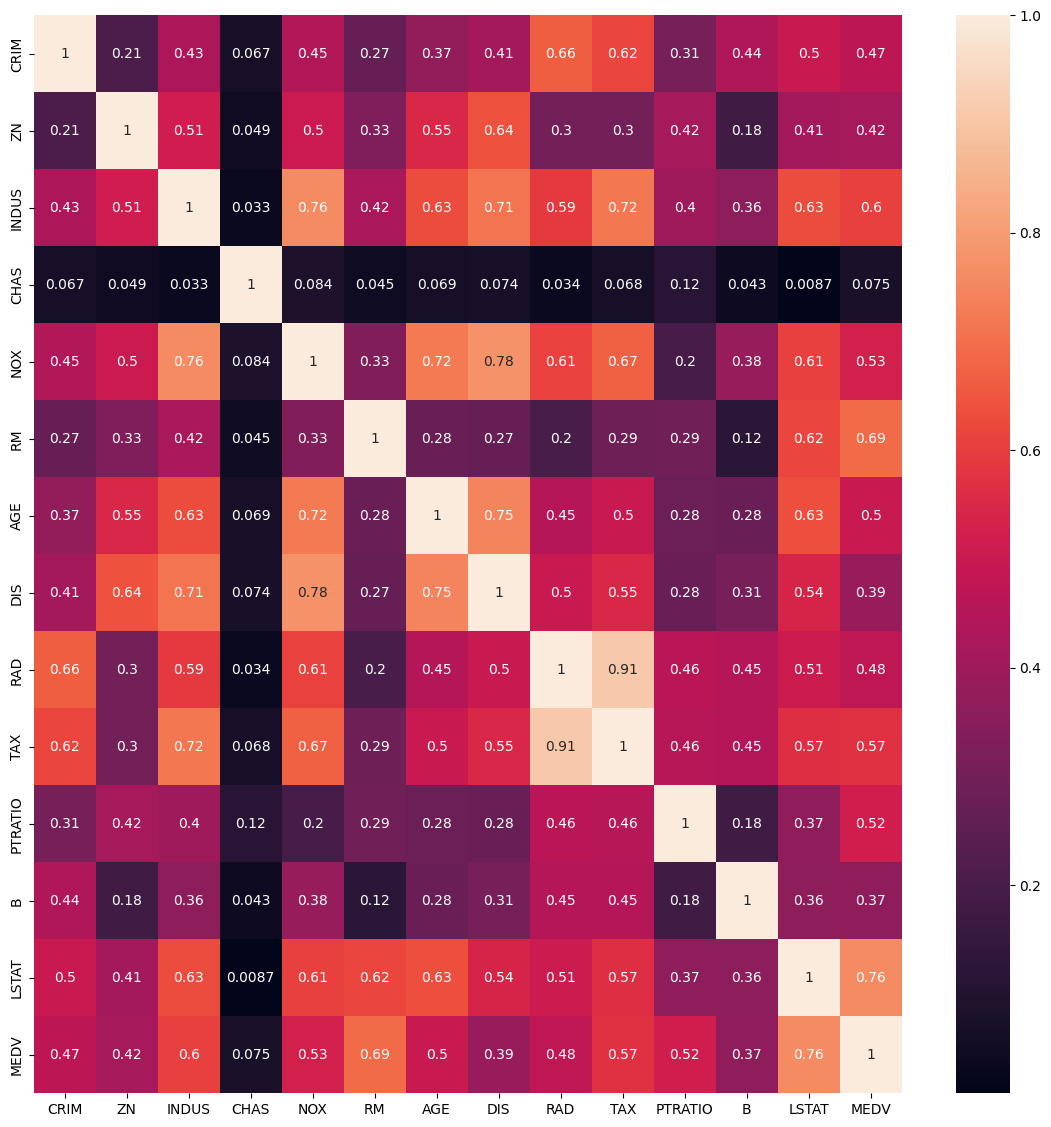

In [16]:
plt.figure(figsize=(14,14))
sns.heatmap(Housing_df.corr().abs(),annot=True)
plt.show()
plt.title("Heatmap")
plt.savefig("Heatmap.png")
plt.close()

In [17]:
Housing_df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## TAX and RAD has highest corelation coefficient of 0.91 so i leave RAD column,LSTAT and CHAS also same so i leave CHAS Column

In [18]:
Selected_col = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x=Housing_df[Selected_col]
y=Housing_df['MEDV']


## Reg plot for All the columns

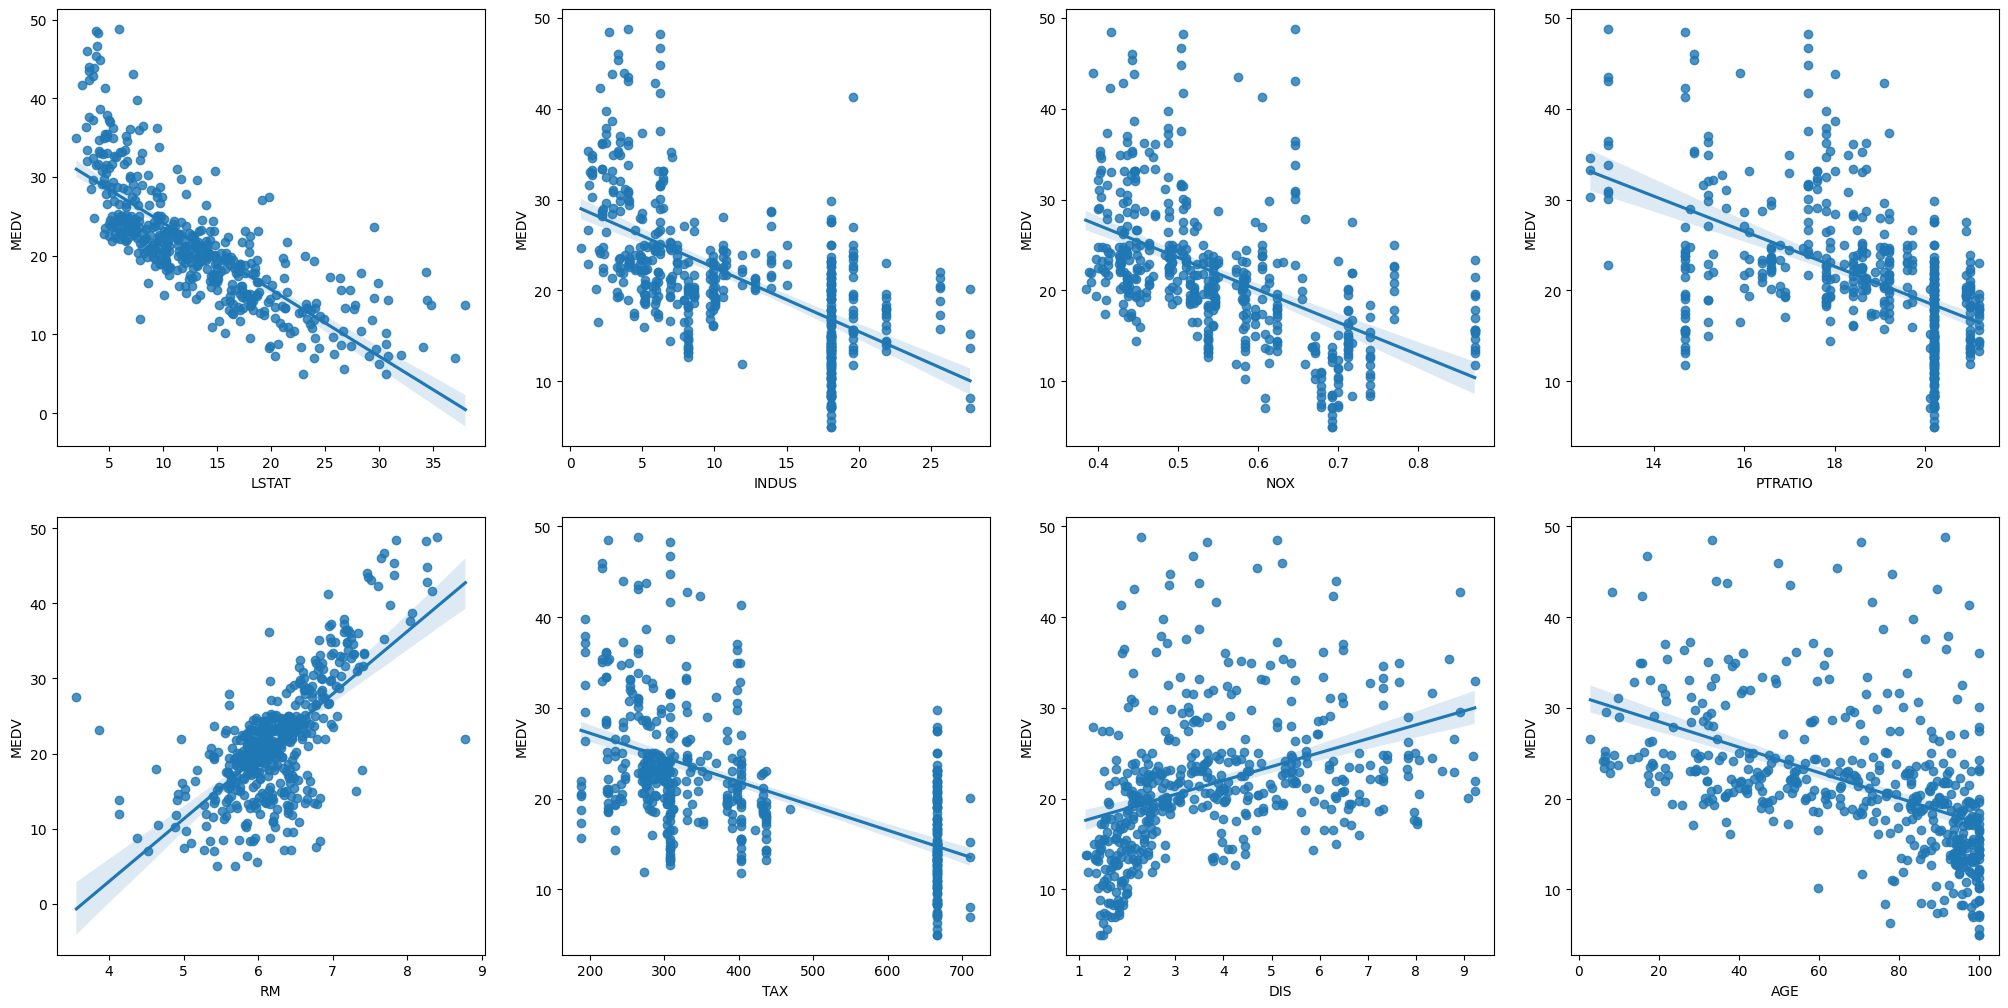

In [19]:
fig,axs = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
axs=axs.flatten()
for i,k in enumerate(Selected_col):
    sns.regplot(y=y,x=x[k],ax=axs[i])
plt.tight_layout(pad=0.4,h_pad=2,w_pad=2)


## Skewness Correction

In [20]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

## Data splitting

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,1.788421,1.196948,0.430483,2.791165,6.575,5.693732,1.627278,4.192680
1,2.316488,2.088153,0.384582,2.933857,6.421,5.493061,1.786261,4.380776
2,1.615420,2.088153,0.384582,2.933857,7.185,5.493061,1.786261,4.128746
3,1.371181,1.156881,0.377066,2.980619,6.998,5.407172,1.954757,3.845883
4,1.845300,1.156881,0.377066,2.980619,7.147,5.407172,1.954757,4.010963
...,...,...,...,...,...,...,...,...
501,2.367436,2.559550,0.452985,3.091042,6.593,5.613128,1.246630,4.249923
502,2.310553,2.559550,0.452985,3.091042,6.120,5.613128,1.190127,4.352855
503,1.893112,2.559550,0.452985,3.091042,6.976,5.613128,1.152943,4.521789
504,2.012233,2.559550,0.452985,3.091042,6.794,5.613128,1.220505,4.503137


In [23]:
y

0      3.218876
1      3.117950
2      3.575151
3      3.538057
4      3.616309
         ...   
501    3.152736
502    3.072693
503    3.214868
504    3.135494
505    2.557227
Name: MEDV, Length: 484, dtype: float64

## Scaling the values for better Accuracy

In [24]:
from sklearn import preprocessing
MM_scaler=preprocessing.MinMaxScaler()
XS_train = MM_scaler.fit_transform(X_train)
XS_test = MM_scaler.transform(X_test)


## Model Training

In [25]:
from sklearn.linear_model import LinearRegression
L_regression = LinearRegression()
L_regression.fit(XS_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
y_pred=L_regression.predict(XS_test)
y_pred

array([2.6051188 , 2.73010284, 3.13324755, 2.73864693, 3.46747465,
       2.64866887, 2.72627918, 2.6288695 , 3.15849916, 3.13322439,
       2.96493578, 3.55391302, 2.94379734, 3.21092899, 3.01511268,
       2.70954281, 3.2007605 , 2.71371066, 3.08397531, 3.26076249,
       3.12797864, 2.88822402, 3.45445785, 2.92899438, 2.80503231,
       2.91299145, 2.91324437, 2.78324247, 3.12954102, 3.26175229,
       3.20536531, 2.91273486, 2.77577443, 3.0516503 , 3.46437726,
       3.0668526 , 3.01572619, 3.10697619, 2.59682533, 2.44108321,
       2.97421957, 3.10391217, 3.45481161, 2.80771034, 2.9264445 ,
       3.1202802 , 2.95166596, 3.03516135, 2.77729373, 3.46533048,
       2.73313494, 2.81679512, 3.43669113, 3.50195046, 2.63138074,
       2.83284208, 3.09416972, 3.31672274, 3.21632117, 2.80234376,
       3.39187686, 3.14410419, 3.08325588, 3.3495575 , 3.06930246,
       3.3765946 , 2.93757185, 3.28087312, 2.63340117, 2.52092599,
       3.47076284, 3.3060865 , 3.09980529, 2.76502855, 3.01707

## Value of Error(ridge)

In [27]:
Ridge_value = y_test-y_pred
Ridge_value

440   -0.162772
496    0.300031
185    0.287752
468    0.262073
308   -0.297789
         ...   
226   -0.090507
415   -0.484612
332   -0.201673
345   -0.099661
126   -0.040103
Name: MEDV, Length: 97, dtype: float64

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test ,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.13271260988524192
MSE: 0.03556732619330584
RMSE: 0.1885930173503405
R²: 0.7283014762636784


In [29]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
cv=cross_val_score(L_regression,XS_train,y_train,cv=kf)
Score=cv.mean()
Score_SD = cv.std()
print(f"Cross Validation Score :{cv}\nCV Mean : {Score}\nCV Standard Deviation : {Score_SD}")



Cross Validation Score :[0.74869322 0.68758462 0.85250266 0.75162638 0.62276567]
CV Mean : 0.7326345083607254
CV Standard Deviation : 0.07627266981029725


In [30]:
import pickle
pickle.dump(L_regression,open("BHP_Mosel.pkl","wb"))
pickle.dump(MM_scaler,open("BHP_Scaler.pkl","wb"))

In [31]:
import sklearn
print(sklearn.__version__)


1.7.2


In [32]:
import flask
print(flask.__version__)

ModuleNotFoundError: No module named 'flask'

In [ ]:
import pandas
print(pandas.__version__)

2.2.2


In [ ]:
import numpy
print(numpy.__version__)

2.0.2


In [ ]:
!python --version

Python 3.12.12
